# ASEN 3200: Orbital Mecahnics HW 2

### Name: Aziz Alwatban
### Date: 01/11/2021

In [527]:
from numpy import *
import sympy as sm
import matplotlib.pyplot as plt

# Problem 1:

**Consider an orbit with the following pieces of information: <br>**
**•r = [ 0 −2 0 ] DU** <br>
**• $\dot{r}$ $\cdot$ ˆk > 0** <br>
**•cos γ = 2/√5 (note, γ is the flightpath angle)** <br>
**•The flightpath angle γ is notionally depicted as a function of true anomaly f in Figure 2** <br>
**•h = √2 DU2/ TU**<br>
**•$\hat{h} \cdot \hat{k}$ = 1/2** <br>
**For all parts, be sure to show units (if applicable).**<br>
**(a) What is the semi-latus rectum?**<br>
**(b) What is the inclination?**<br>
**(c) What are the ascending node, argument of periapsis, and true anomaly?**<br>
**(d) What is the semi-major axis and the eccentricity?**<br>
**(e) Draw the orbit. Identify the apoapsis, perifocal frame, and current location in the orbit.**

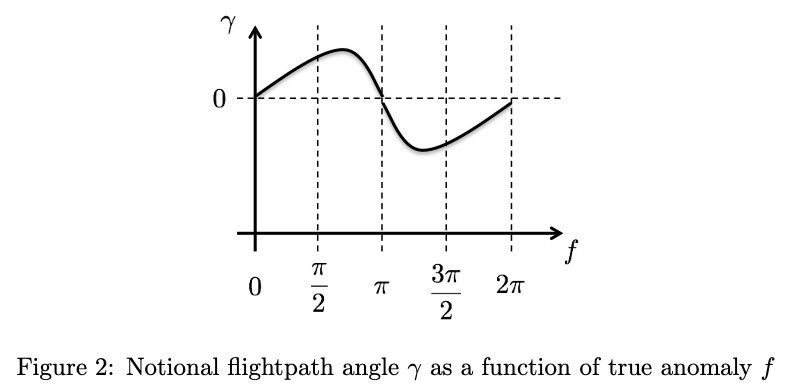

In [528]:
r = [0, -2, 0]
gamma = arccos(2/sqrt(5))
h = double(sqrt(2))
mu = 1
gamma

0.46364760900080615

### Part a)

In [529]:
p = h**2 / mu
print("The semi-latus rectum is {:.2f} DU".format(p))

The semi-latus rectum is 2.00 DU


### Part b)
The inclination is the angle between k and h, and we know that $\hat{k} \cdot \hat{h} = 0.5$

In [530]:
i = arccos(0.5)
print("The inclination is {:.2f} radians or {:.2f} degrees".format(i, i/pi*180))

The inclination is 1.05 radians or 60.00 degrees


### Part c)
Since P = r, we know that r is along the semi-latus rectum of an ellipsoid. Its either the true anamoly is $f = 90^o$ or $ f = 270^o$. We know that the flight angle is positive, which means the spacecraft is along the upper side of the ellipse. We also know that the spacecraft's velocity along the k axis is positive, meaning it is ascending and for that reasong its moving clockwise. Thus $f=90^o$ and by geometry $\Omega = 270^o$ and $w = 90^o$

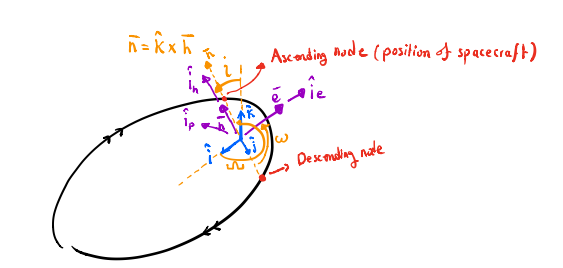

In [531]:
f = 90
hvec = [h*sin(i), 0, h*cos(i)]
n = -cross(array([0,0,1]), hvec)
w = arccos(dot(n, array([1,0,0])) / linalg.norm(n))
Omega = arccos(dot(array([1,0,0]), n) / linalg.norm(n))
print("The ascending node is 270 deg and the argument of periapsis is 90 deg and the true anamoly is 90 deg")

The ascending node is 270 deg and the argument of periapsis is 90 deg and the true anamoly is 90 deg


### Part d)
$ r = \frac{P}{1+e cos(f)}$

### Part e)
check above

# Problem 2:

**Write a matlab code that computes the position and velocity vectors in the ECI frame**<br>
**to perifocal and topocentric given the following vectors:**<br>
**(a)**<br>
$$r = [ −1.0 −1.8 1.0] \;DU $$
$$ \dot{r} = [0.3 0.3 0.4]\; DU/DT$$
**with λ = 15°and φ = 25°**<br>
**(b)**<br>
$$r = [2.4 −2.4 −2.0] \;DU $$
$$ \dot{r} = [0.5 −0.2 0.2]\; DU/DT$$
**with λ = 65°and φ = 42°** <br> 
**(c) Use this code to provide a check for problems 3a and 3c.**<br>
**(d) Include your code**

In [532]:
# define function to convert from ECI frame to perifocal
def ECItoPerifocal(r, rdot):
    i_hat = array([1,0,0])
    k_hat = array([0,0,1])
    h = cross(r, rdot)
    h_hat = h/linalg.norm(h)
    e = 1/mu * (cross(rdot, h) - mu*r/linalg.norm(r))
    n = cross(k_hat, h_hat)
    n = n / linalg.norm(n)
    
    i = arccos(dot(h_hat, k_hat))
    w = arccos(dot(n, e)/linalg.norm(e))
    omega = arccos(dot(i_hat, n))

    CNP = matrix([[cos(w)*cos(omega)-sin(w)*cos(i)*sin(omega), cos(w)*sin(omega)+sin(w)*cos(i)*cos(omega), sin(w)*cos(i)],
       [-sin(w)*cos(omega)-cos(w)*cos(i)*sin(omega), -sin(w)*sin(omega)+cos(w)*cos(i)*cos(omega), cos(w)*sin(i)],
        [sin(i)*sin(omega), -sin(i)*cos(omega), cos(i)]])
    r_P = CNP @ r
    rdot_P = CNP @ rdot
    return r_P, rdot_P

In [533]:
def ECItoTopocentric(r, rdot,lat, long):
    Rearth = 1
    i_hat = array([1,0,0])
    j_hat = array([0,1,0])
    k_hat = array([0,0,1])
    OP = Rearth * cos(long) * i_hat + Rearth * sin(long) * j_hat + Rearth * sin(lat) * k_hat
    u_hat = OP / linalg.norm(OP)
    e_hat = cross(k_hat, u_hat) / linalg.norm(cross(k_hat, u_hat))
    n_hat = cross(u_hat, e_hat)
    C1 = array([ u_hat, e_hat, n_hat   ]) #rotation matrix from ECI to Topocentric at point P
    r_topo = C1 @ r
    rdot_topo = C1 @ rdot
    #rotation matrix to align axis with poin P using longitude and latitude
    C2 = [[cos(lat)*cos(long), cos(lat)*sin(long), -sin(lat)] , [-sin(long), cos(long), 0],
         [-sin(lat)*cos(long), sin(long)*sin(lat), cos(lat)]]
    r_topo = C1 @ C2 @ r
    rdot_topo = C1 @ C2 @ rdot
    return r_topo, rdot_topo

### Part a)

In [534]:
r = array([-1, -1.8, 1])
rdot = array([0.3,0.3,0.4])

In [535]:
#Perifocal Frame:
r_P, rdot_P = ECItoPerifocal(r, rdot)
print("The position and velocity vectors at perifocal frame are {} DU \n and {} DU/TU repsectively"
      .format(around(r_P,2), around(rdot_P,2)))

The position and velocity vectors at perifocal frame are [[ 1.01 -1.11 -1.62]] DU 
 and [[-0.08 -0.32  0.49]] DU/TU repsectively


In [536]:
#Topocentric Frame:
lat = 25/180*pi
long = 15/180*pi
r_topo, rdot_topo = ECItoTopocentric(r, rdot, lat, long)
print("The position and velocity vectors at topocentric frame are {} DU \n and {} DU/TU repsectively"
      .format(around(r_topo,2), around(rdot_topo,2)))

The position and velocity vectors at topocentric frame are [-1.45 -0.98  1.83] DU 
 and [0.3  0.16 0.17] DU/TU repsectively


### Part b)

In [537]:
r = array([2.4, -2.4, -2])
rdot = array([0.5, -0.2, 0.2])

In [538]:
#Perifocal Frame:
r_P, rdot_P = ECItoPerifocal(r, rdot)
print("The position and velocity vectors at perifocal frame are {} DU \n and {} DU/TU repsectively".format(r_P, rdot_P))

The position and velocity vectors at perifocal frame are [[-2.04595854  1.5715659   2.26326133]] DU 
 and [[-0.29126396 -0.24850152  0.47151278]] DU/TU repsectively


In [539]:
#Topocentric Frame:
lat = 25/180*pi
long = 15/180*pi
r_topo, rdot_topo = ECItoTopocentric(r, rdot, lat, long)
print("The position and velocity vectors at topocentric frame are {} DU \n and {} DU/TU repsectively"
      .format(around(r_topo,2), around(rdot_topo,2)))

The position and velocity vectors at topocentric frame are [ 0.23 -3.46 -3.41] DU 
 and [ 0.18 -0.39 -0.12] DU/TU repsectively


# Problem 3:

**Write a matlab code that computes the orbital elements given the position and velocity**<br>
**vectors in the ECI frame.**<br>
**(a)**<br>
$$r = [3.0 2.0 1.0] \;DU $$
$$\dot{r} = [−0.2 0.4 0.4] \; DU/DT$$
**(b)**
$$r = [−2.5 −1.7 −2.5] DU $$
$$\dot{r} = [0.3 −0.3 0.4] \; DU/DT $$
**(c) Use this code to provide a check for problems 4a and 5b from HW O1.**

In [540]:
def ECItoOE(r, rdot):
    mu = 1
    h = cross(r, rdot)
    h_hat = h/linalg.norm(h)
    ihat = array([1,0,0])
    k = array([0,0,1])
    n = cross(k, h)
    evec = 1/mu * (cross(rdot, h) - mu*r/linalg.norm(r))
    e = linalg.norm(evec)
    Energy = 0.5*linalg.norm(rdot)**2 -mu/linalg.norm(r)
    
    if round(e,2) != 1:
        a = -mu/(2*Energy)
        P = a*(1-e**2)
    else:
        P = linalg.norm(h)**2/mu
        a = NaN
        
    i = arccos(dot(k, h)/linalg.norm(h))
    Omega = arccos(dot(ihat,n)/linalg.norm(n))
    w = arccos(dot(n, evec)/(linalg.norm(n)*e))
    f = arccos(dot(evec, r)/(e*linalg.norm(r)))
    return (a, e, i, Omega, w, f)
        

### Part a)

In [541]:
r = array([3, 2, 1])
rdot = array([-0.2, 0.4, 0.4])
a, e, i, Omega, w, f = ECItoOE(r, rdot)


In [542]:
print("The orbital elements are:")
print(" a = {:.2f} DU \n e = {:.2f} \n omega = {:.2f} rad \n w = {:.2f} rad \n f = {:.2f} rad".format(a,e,Omega,w,f))

The orbital elements are:
 a = 5.73 DU 
 e = 0.43 
 omega = 0.28 rad 
 w = 0.54 rad 
 f = 0.94 rad


### Part b)

In [543]:
r = array([-2.5, -1.7, -2.5])
rdot = array([0.3, -0.3, 0.4])
a, e, i, Omega, w, f = ECItoOE(r, rdot)

In [544]:
print("The orbital elements are:")
print(" a = {:.2f} DU \n e = {:.2f} \n i = {:.2f} rad \n\
        omega = {:.2f} rad \n w = {:.2f} rad \n f = {:.2f} rad".format(a,e,i, Omega,w,f))

The orbital elements are:
 a = 5.89 DU 
 e = 0.61 
 i = 0.86 rad 
        omega = 1.74 rad 
 w = 0.66 rad 
 f = 1.67 rad


### Part c)

In [545]:
r = [1.5, 1, 0.8]
rdot = [-0.5, -0.3, -0.2]
a, e, i, Omega, w, f = ECItoOE(r, rdot)

In [546]:
print("The orbital elements are:")
print(" a = {:.2f} DU \n e = {:.2f} \n i = {:.2f} deg \n omega = {:.2f} deg \n w = {:.2f} deg \n \
    f = {:.2f} rad".format(a,e,i/pi*180, Omega/pi*180,w/pi*180,f/pi*180))

The orbital elements are:
 a = nan DU 
 e = 1.00 
 i = 65.10 deg 
 omega = 21.80 deg 
 w = 157.63 deg 
     f = 175.80 rad


In [547]:
r = array([ 3133708.62327072,  1140576.66173386, -1747464.82734484])/6378000
rdot = array([ -1863.43125865,   -678.23351175, -12559.36237644])/6378000*806.8
print(r)
print(rdot)

[ 0.49133092  0.17882983 -0.2739832 ]
[-0.23571909 -0.08579473 -1.58872586]


In [548]:
a, e, i, Omega, w, f = ECItoOE(r, rdot)
print("The orbital elements are:")
print(" a = {:.2f} DU \n e = {:.2f} \n i = {:.2f} deg \n \
omega = {:.2f} deg \n w = {:.2f} deg \n f = {:.2f} deg".format(a,e,i/pi*180, Omega/pi*180,w/pi*180,f/pi*180))

The orbital elements are:
 a = 1.25 DU 
 e = 0.59 
 i = 90.00 deg 
 omega = 160.00 deg 
 w = 156.29 deg 
 f = 51.36 deg


# Problem 4:

**Given an object with an orbit such that p = 2 DU and e = 1~3, what are the**<br>
**corresponding E and f for the following times (use a numerical tolerance of 1e−9)? for each**<br>
**time t, show your answers by filling out a table of the following form:**<br>
**Iteration k ∆E (rad) Eccentric Anomaly E (rad) True Anomaly f (rad)**<br>

**(a) t = 1e-3**<br>
**(b) t = 1**<br>
**(c) t = 5**

In [549]:
P = 2
e = 1/3
a = P / (1-e**2)

In [550]:
#defining a function for Newton's metod
def NewtonMethodE(E0, t, k):
    
    def f(E):
        M = sqrt(1/a**3) * t
        func = E - e*sin(E)-M
        return func
    
    def df(E):
        df = 1-e*cos(E)
        return df    
    
    x = zeros(k)
    dE = zeros(k)
    b = 0
    for intercept in range(0,k):
        E1 = E0 - (f(E0)/df(E0))
        dE[intercept] = abs(E1 - E0)
        if (dE[intercept] < 10**(-9)):
            break
        E0 = E1
        x[intercept] = E1 #save values
        b = b+1
    x = x[0:b]
    dE = dE[0:b]
        
    return dE, x

In [551]:
def TrueAnamoly(E0, t, k):
    dE, E = NewtonMethodE(E0, t, k)
    z = sqrt((1+e)/(1-e)) * tan(E/2)
    f = 2*arctan(z)
    return dE, E, f
    
dE1, E1, f1 = TrueAnamoly(-2.4, 10**(-3), 20)
dE2, E2, f2 = TrueAnamoly(-2.4, 1, 20)
dE3, E3, f3 = TrueAnamoly(-2.4, 5, 20)

In [552]:
def printTable(dE, E, f):
    print ("{:<12}   {:<25}     {:<12}".format('dE','Eccentric Anomaly E (rad)','True Anomaly f (rad)'))

    for i in range(1, len(E1)):
        print ("{:e}  ".format( dE[i] ), end="")
        print ("     {:e}".format(E[i]), end="")
        print ("               {:e}".format(f[i]))

In [553]:
print("t = 1e-3")
printTable(dE1, E1, f1)
print("\n")
print("t = 1")
printTable(dE2, E2, f2)
print("\n")
print("t = 5")
printTable(dE3, E3, f3)

t = 1e-3
dE             Eccentric Anomaly E (rad)     True Anomaly f (rad)
6.139363e-01       -4.008075e-02               -5.667515e-02
4.051429e-02       4.335407e-04               6.131191e-04
1.090376e-05       4.444444e-04               6.285393e-04


t = 1
dE             Eccentric Anomaly E (rad)     True Anomaly f (rad)
8.313079e-01       4.148896e-01               5.786048e-01
2.269195e-02       4.375815e-01               6.093216e-01
5.040436e-05       4.375311e-01               6.092535e-01


t = 5
dE             Eccentric Anomaly E (rad)     True Anomaly f (rad)
1.565382e+00       2.100310e+00               2.371176e+00
2.834239e-01       1.816886e+00               2.133665e+00
1.120407e-02       1.805682e+00               2.123879e+00


# Problem 5:

**Using the same initial conditions as problem 1 in HW O1,**<br>
**(a) Use Kepler’s time of flight equation (use a tolerance of 1e−9) to compute the position**<br>
**and velocity vectors at the same times as your ode45 solutions.**<br>
**(b) Compute the values of the angular momentum vector, eccentricity vector, and orbit**<br>
**energy for each of those times, and compare them to the values you obtained through**<br>
**numerical integration with ode45. Are they the same? Different? If the same, why? If**<br>
**different, which one is ‘right’ ?**

In [554]:
r = array([7642, 170, 2186])/6378
rdot = array([0.32, 6.91, 4.29])/6378*806.8
h = cross(r, rdot)
P = linalg.norm(h)**2/mu
eVec = 1/mu * (cross(rdot, h) - mu * r/linalg.norm(r))
e = linalg.norm(eVec)
a = P / (1-e**2)
t = linspace(0, 10000, 1301) #from ode45

### Part a)

In [555]:
j = 0
E = zeros(len(t))
f = zeros(len(t))
r = zeros(len(t))
for i in t:
    _, E1, f1 = TrueAnamoly(E0, i, k)
    E[j] = E1[-1]
    f[j] = f1[-1]
    r[j] = a*(1-e*cos(E[j]))
    j = j+1
    
rVec = column_stack((r*cos(f), r*sin(f) ))
rdot = sqrt(mu/P) * column_stack( (-sin(f), (e+cos(f))) )
rVec

array([[ 1.15091433e+00, -8.03246237e-14],
       [-2.52227766e+00,  6.54358976e-02],
       [ 1.12506559e+00, -2.84871771e-01],
       ...,
       [ 3.80196167e-01,  1.38769510e+00],
       [-2.35132211e+00, -7.20591526e-01],
       [ 5.76248500e-01,  1.23805792e+00]])

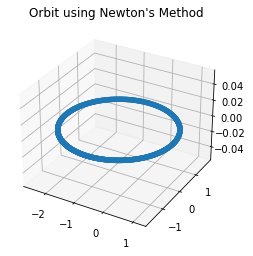

In [556]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(rVec[:,0], rVec[:,1])
title = plt.title("Orbit using Newton's Method")

### Part b)

In [557]:
hNewton = cross(rVec, rdot)
Energy = [- mu / (2*a)] * len(t)
hNewton

array([1.25732531, 1.25732531, 1.25732531, ..., 1.25732531, 1.25732531,
       1.25732531])

Text(0, 0.5, 'e')

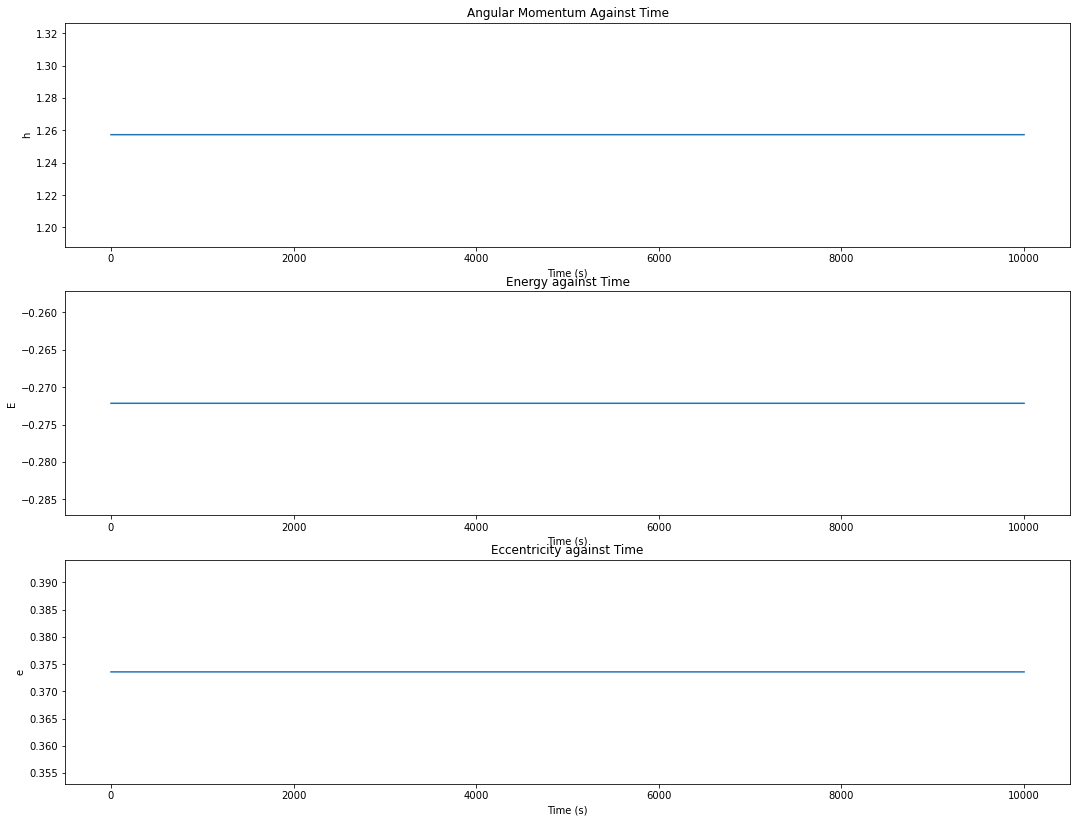

In [558]:
# Plotting:
fig, ax = plt.subplots(3, 1, figsize = (18, 14 ))
ax[0].plot(t, hNewton)
ax[0].set_title("Angular Momentum Against Time")
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("h")
print("\n\n")

ax[1].plot(t, Energy)
ax[1].set_title("Energy against Time")
ax[1].set_xlabel("Time (s)")
ax[1].set_ylabel("E")
print("\n")

ax[2].plot(t, [e]*len(t))
ax[2].set_title("Eccentricity against Time")
ax[2].set_xlabel("Time (s)")
ax[2].set_ylabel("e")

Same values as the ode45 but this one is constant without noise